# Compare the GOES and FISM models

Compre the model developed using the GOES irr data and the model developed using the FISM2 data. 

In [18]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [56]:
import os, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset


# path to the ml_fw module for investigating
# residuals
path_mod = 'd:\\GitHub\\ml_fw\\ml_fw'

In [20]:
path_mod

# add the ml_fw module to Python Path and import what we need
sys.path.append(os.path.dirname(path_mod))
import ml_fw.inspect as inspect

'd:\\GitHub\\ml_fw\\ml_fw'

In [2]:
gs_f = "D:\data\SatDensities\goes_model.pkl"
fi_f = "D:\data\SatDensities\FI_GEO_noAE_RFdat_AIMFAHR.pkl"

In [107]:
# get the champ out of sample data from 
# both models
gs_dat = pd.read_pickle(gs_f)[4]
fi_dat = pd.read_pickle(fi_f)[4]

In [109]:
# calculate the residuals
gs_dat['resid'] = gs_dat['400kmDensity']-gs_dat['400kmDensity_pred']
fi_dat['resid'] = fi_dat['400kmDensity']-fi_dat['400kmDensity_pred']

In [89]:
gs_dat.shape
fi_dat.shape

(185149, 17)

(790123, 14)

In [94]:
gs_dat.describe()

,irr_1216_gx,SYM_H index,SatLat,subsol_lat,solar_dec,cos_SatLon,sin_SatLon,cos_subsol_lon,sin_subsol_lon,cos_solar_ra,sin_solar_ra,400kmDensity,DateTime,storm,storm phase,400kmDensity_pred,resid
count,185149.000000,185149.000000,185149.000000,185149.000000,185149.000000,185149.000000,185149.000000,185149.000000,185149.000000,185149.000000,185149.000000,185149.000000,185149,185149.000000,185149.000000,185149.000000,185149.000000
mean,0.006247,-7.362816,-0.074648,0.021594,0.019482,0.000284,-0.000133,-0.005157,-0.016512,0.004920,-0.000129,0.720399,2009-03-22 07:02:46.912054528,-0.132677,0.138969,0.593998,0.126401
min,0.000212,-99.000000,-87.255360,-23.437689,-23.438377,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000030,2006-07-04 08:25:00,-1.000000,-1.000000,0.090704,-1.340129
25%,0.006030,-13.000000,-45.071180,-14.924341,-14.939112,-0.708862,-0.704863,-0.719240,-0.715429,-0.764874,-0.615432,0.418331,2008-09-15 22:55:00,-1.000000,-1.000000,0.387417,-0.024587
50%,0.006228,-6.000000,-0.055780,0.461004,0.457925,0.002229,0.000555,-0.025357,-0.025375,-0.068202,0.018440,0.637600,2009-03-20 01:35:00,-1.000000,-1.000000,0.536253,0.087127
75%,0.006449,-1.000000,45.035500,14.613719,14.632664,0.709557,0.705098,0.717692,0.676044,0.846167,0.602247,0.910121,2010-03-25 18:45:00,1.000000,2.000000,0.736238,0.252036
max,0.007690,57.000000,87.249160,23.437470,23.437791,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.182578,2010-09-04 00:00:00,1.000000,2.000000,2.476222,3.010928
std,0.000281,11.268889,51.789133,15.408953,15.414609,0.708241,0.705974,0.713385,0.700563,0.762565,0.646897,0.409180,NaN,0.991162,1.340013,0.280385,0.246565


In [90]:
# define the x_cols of dat that we want to use for binning
# and their ranges and number of bins
x_dat = 'SYM_H index'
x_bin = 21
x_range = [-200,10]
# the y_col to derive the stats
y_dat = ['resid']

whisker = 0 # don't want whiskers
showmean = True # plot the means

In [91]:
gs_box = inspect.boxplot_vx(gs_dat[x_dat],gs_dat[y_dat], whisker=whisker,
                           bins=x_bin,xrange=x_range)
fi_box = inspect.boxplot_vx(fi_dat[x_dat],fi_dat[y_dat], whisker=whisker,
                           bins=x_bin,xrange=x_range)

In [92]:
ae_box = gs_box['SYM_H index'] # the AE box/whisker data
y_val = ae_box['box_stats'] # a list of dictionaries for each box/whisker instance
x_val = ae_box['x_centre'] # the center of each x bin
x_width = ae_box['x_width'] # the width of each x bin
x_tk = np.append(x_val,x_val.max()+x_width)-x_width/2.

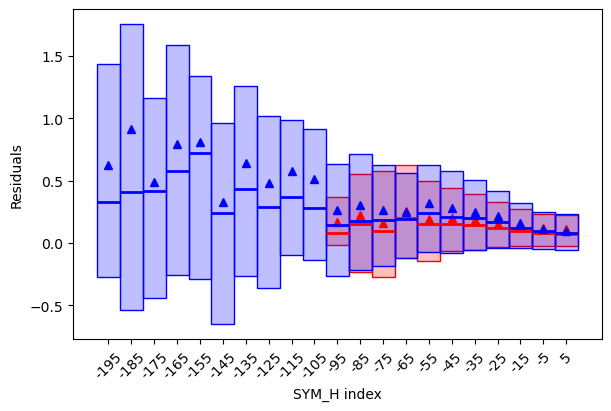

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(6,4))
fig.set_constrained_layout(True)


cc = [1,0,0] # red box plot
bx_a = 0.25 # transparency level (alpha) for box
ln_a = 1.0 # transparency level for lines
ln_w = 2.0 # line width

ae_box = gs_box['SYM_H index'] # the AE box/whisker data
y_val = ae_box['box_stats'] # a list of dictionaries for each box/whisker instance
x_val = ae_box['x_centre'] # the center of each x bin
x_width = ae_box['x_width'] # the width of each x bin
x_tk = np.append(x_val,x_val.max()+x_width)-x_width/2.

b1 = ax.bxp(y_val, positions=x_val, widths=x_width, 
                  patch_artist=True, showmeans=showmean, 
                  shownotches=False, showcaps=False, 
                  boxprops={'ec':cc+[ln_a], 'fc':cc+[bx_a]}, # artist properties for boxes
                  medianprops={'c':cc, 'lw':ln_w}, # artist properties for medians
                  meanprops={'mec':cc, 'mfc':cc}) # artist propoerties for means

cc = [0,0,1]

ae_box = fi_box['SYM_H index'] # the AE box/whisker data
y_val = ae_box['box_stats'] # a list of dictionaries for each box/whisker instance
x_val = ae_box['x_centre'] # the center of each x bin
x_width = ae_box['x_width'] # the width of each x bin
x_tk = np.append(x_val,x_val.max()+x_width)-x_width/2.

b2 = ax.bxp(y_val, positions=x_val, widths=x_width, 
                  patch_artist=True, showmeans=showmean, 
                  shownotches=False, showcaps=False, 
                  boxprops={'ec':cc+[ln_a], 'fc':cc+[bx_a]}, # artist properties for boxes
                  medianprops={'c':cc, 'lw':ln_w}, # artist properties for medians
                  meanprops={'mec':cc, 'mfc':cc}) # artist propoerties for means



# lets fix the x-axis a bit and label everything
_ = ax.set_xticks(x_val,x_val.astype(int).astype(str),rotation=45)
_ = ax.set_ylabel('Residuals')
_ = ax.set_xlabel(x_dat)

In [100]:
gs_dat.columns

Index(['irr_1216_gx', 'SYM_H index', 'SatLat', 'subsol_lat', 'solar_dec',
       'cos_SatLon', 'sin_SatLon', 'cos_subsol_lon', 'sin_subsol_lon',
       'cos_solar_ra', 'sin_solar_ra', '400kmDensity', 'DateTime', 'storm',
       'storm phase', '400kmDensity_pred', 'resid'],
      dtype='object')

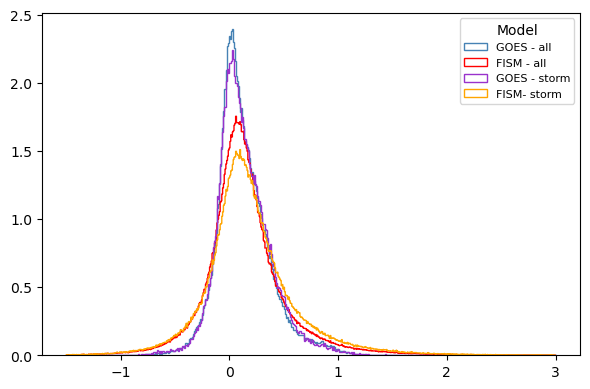

In [113]:
fig2, ax2 = plt.subplots(1,1, figsize=(6,4))
hmin = -1.5
hmax = 3

gs_st = gs_dat['storm'] == 1
fi_st = fi_dat['storm'] == 1

hbins_gs = np.histogram_bin_edges(gs_dat['resid'],bins='fd',range=(hmin,hmax))
hbins_fi = np.histogram_bin_edges(fi_dat['resid'],bins='fd',range=(hmin,hmax))

# Resid hists
_ = ax2.hist(gs_dat['resid'],bins=hbins_gs, alpha = 1, label='GOES - all', density=True, color='steelblue', histtype='step', cumulative=False)
_ = ax2.hist(fi_dat['resid'],bins=hbins_fi, alpha = 1, label='FISM - all', density=True, color= 'red', histtype='step', cumulative=False)
_ = ax2.hist(gs_dat.loc[gs_st,'resid'],bins=hbins_gs, alpha = 1, label='GOES - storm', density=True, color='darkorchid', histtype='step', cumulative=False)
_ = ax2.hist(fi_dat.loc[fi_st,'resid'],bins=hbins_fi, alpha = 1, label='FISM- storm', density=True, color= 'orange', histtype='step', cumulative=False)

ax2.legend(bbox_to_anchor=(1., 1),loc='upper right',fontsize=8)
ax2.get_legend().set_title("Model")

plt.tight_layout()
